# Project Ref: PM-PR-0017

# Business Case:
No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

## Domain Analysis:

The dataset comprises of a total of 21 columns and 4617 rows 
1. State - which state does the account belong in the country.
2. Account Length - No. of days the customer has been with the dedicated brand.
3. Area Code - refers to the area they resides.
4. Phone - the customer's unique identifier number.
5. International Plan - if the customer has international plan or not.
6. VMail Plan - if the customer has voice mail plan or not.
7. VMail Message - customer voice mail inbox messages.
8. Day Mins - how many minutes the customer has attended the call in the day times.
9. Day Calls - no. of calls the customer made in a day.
10. Day Charge - the total expense incured by day usage.
11. Eve Mins - how many minutes the customer has attended the call in the evening times.
12. Eve Calls - no. of calls the customer made in an evening.
13. Eve Charge - the total expense incured by evening usage.
14. Night Mins - how many  in minutes the customer has attended the call in the night times.
15. Night Calls - no. of calls the customer made in a night.
16. Night Charge - the total expense incured by might usage.
17. International mins - how many minutes the customer has attended the Interantional Calls.
18. International call - no. of international calls the customer made.
19. International charge - the total expense incured by international usage.
20. CustServ Calls - calls made to the customer service.
21. Churn - Wheather a customer is discontinued or continued using the service

In [4]:
# Import Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

import mysql.connector

In [5]:
# connection to server

connection = mysql.connector.connect(host = "18.136.157.135",
                                     username = "dm_team3",
                                     password = "DM!$!Team!27@9!20&",
                                     database = "project_telecom")

#### Established a connection to the database server to enable data retrieval and manipulation.

In [6]:
# Tables in the database

table = pd.read_sql("show tables", connection)
print(table)

  Tables_in_project_telecom
0        telecom_churn_data


In [7]:
# Descriptive about the table

table_name = 'telecom_churn_data'
table_details = pd.read_sql(f'describe {table_name}', connection)
print(table_details)

        Field          Type Null Key Default Extra
0    columns1  varchar(555)  YES        None      
1    columns2  varchar(555)  YES        None      
2    columns3  varchar(555)  YES        None      
3    columns4  varchar(555)  YES        None      
4    columns5  varchar(555)  YES        None      
5    columns6  varchar(555)  YES        None      
6    columns7  varchar(555)  YES        None      
7    columns8  varchar(555)  YES        None      
8    columns9  varchar(555)  YES        None      
9   columns10  varchar(555)  YES        None      
10  columns11  varchar(555)  YES        None      
11  columns12  varchar(555)  YES        None      
12  columns13  varchar(555)  YES        None      
13  columns14  varchar(555)  YES        None      
14  columns15  varchar(555)  YES        None      
15  columns16  varchar(555)  YES        None      
16  columns17  varchar(555)  YES        None      
17  columns18  varchar(555)  YES        None      
18  columns19  varchar(555)  YE

**Insights:**
1) The table contains 21 columns, all named sequentially (columns1 to colummns21).
2) Each column has the same data type: varchar(555).
3) All Columns allows Null values.

In [8]:
# Loading the dataset

query = "select * from telecom_churn_data;"
data = pd.read_sql(query, connection)
data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


The dataset has no proper feature names. To ensure clarity and consistency, the unnamed column was renamed to a meaningful feature names based on the Meta info of the data available in the Business case.

In [9]:
# Renaming the Unnamed columns with meaningful feature names

data.columns = ['State',
'Account Length',
'Area Code',
'Phone', 
'International Plan', 
'VMail Plan', 
'VMail Message', 
'Day Mins', 
'Day Calls', 
'Day Charge', 
'Eve Mins', 
'Eve Calls', 
'Eve Charge', 
'Night Mins', 
'Night Calls', 
'Night Charge', 
'International Mins', 
'International Calls', 
'International Charge', 
'CustServ Calls',
'Churn']

### Basic Checks

In [10]:
# To see the first 5 rows
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
# To see the last 5 rows
data.tail()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [12]:
# Shape of the dataset

data.shape

(4617, 21)

The dataset consist of 4617 rows and 21 Columns

In [13]:
# To see the columns, Data types and non-null counts 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

1. The dataset has 21 object data type features
2. No Null values in the dataset

In [14]:
# Data types of the features

data.dtypes

State                   object
Account Length          object
Area Code               object
Phone                   object
International Plan      object
VMail Plan              object
VMail Message           object
Day Mins                object
Day Calls               object
Day Charge              object
Eve Mins                object
Eve Calls               object
Eve Charge              object
Night Mins              object
Night Calls             object
Night Charge            object
International Mins      object
International Calls     object
International Charge    object
CustServ Calls          object
Churn                   object
dtype: object

We need to convert the object data type into int & float as per the Business case

In [15]:
# typecasting the features into requried datatypes

int_cols = ['Account Length', 'Area Code', 'VMail Message', 'Day Calls',
            'Eve Calls','Night Calls', 'International Calls', 'CustServ Calls']

float_cols = ['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
              'Night Charge', 'International Mins', 'International Charge']

for i in int_cols:
    data[i] = pd.to_numeric(data[i], errors = 'coerce', downcast = 'integer')

for i in float_cols:
    data[i] = pd.to_numeric(data[i], errors = 'coerce')

In [16]:
# Descriptive Statistics of Numerical Columns

data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
# Checking for the duplicate values in the dataset

data.duplicated().sum()

np.int64(0)

No Duplicated Values in the dataset

## Exploratory Data Analysis

In [18]:
# Unique values of the Churn
data['Churn'].unique()

array([' False.', ' True.'], dtype=object)

In [19]:
# Mapping the Categorical values into the Numerical values 0 and 1

data['Churn'] = data['Churn'].astype(str).str.replace('.','',regex = False).str.strip()
data['Churn'] = data['Churn'].map({'False': 0, 'True':1})

1) The False is converted into 0
2) The True is converted into 1 using the map function

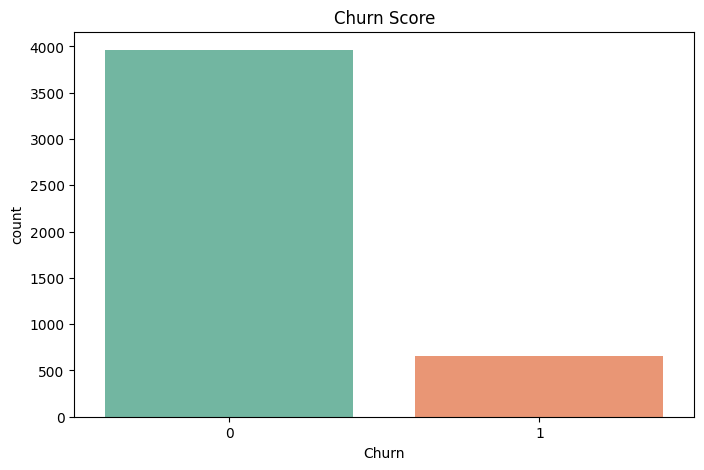

Overall churn rate: 14.21%


In [20]:
# Plotting the Churn

plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'Churn', palette = 'Set2')
plt.title("Churn Score")
plt.show()

churn_rate = data['Churn'].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

**Insights:**
1) The Dataset shows that 86.79% of customers retained(non-churn) and 14% churn.
2) The overall churn rate  14.21%. It really impacts the revenue of the company.
3) In Telecom retaining a customer is 5% cheaper than acquring a new one.
4) The dataset is imbalanced.

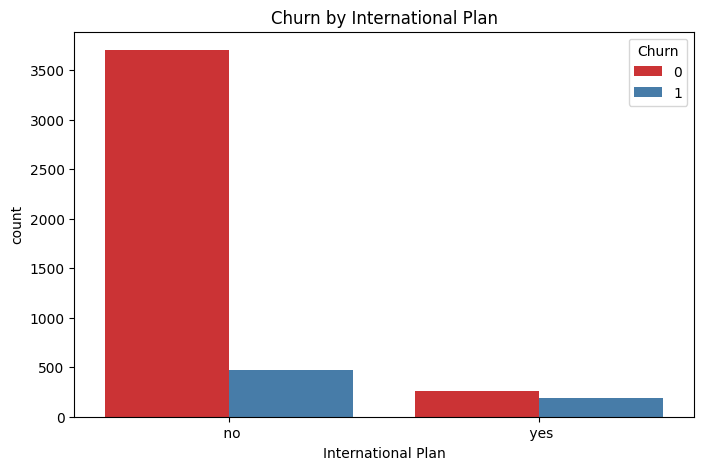

International Plan
no     0.112683
yes    0.417040
Name: Churn, dtype: float64


In [21]:
# plotting Churn with International plan

plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'International Plan',hue = 'Churn', palette = 'Set1')
plt.title("Churn by International Plan")
plt.show()

print(data.groupby('International Plan')['Churn'].mean())

**Insights:**
1. Customers with an International Plan have a much higher proportion of churn compared to those without it.
2. This suggests that international plan users are more price-sensitive or dissatisfied, making them a key target group for retention offers.

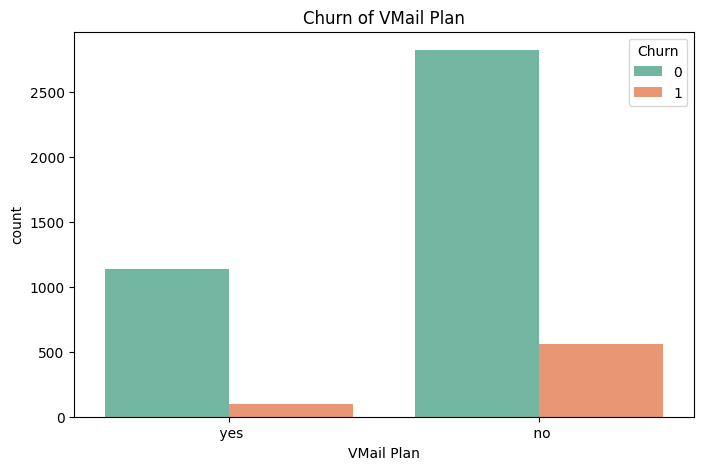

VMail Plan
no     0.165336
yes    0.078479
Name: Churn, dtype: float64


In [22]:
# Plotting Churn with VMail Plan

plt.figure(figsize=(8,5))
sns.countplot(data = data, x = 'VMail Plan', hue = 'Churn', palette = 'Set2')
plt.title("Churn of VMail Plan")
plt.show()

print(data.groupby('VMail Plan')['Churn'].mean())

**Insights:**
1. Customers with a Voicemail Plan churn far less compared to those without it.
2. This indicates that voicemail users are more engaged and loyal, making them less likely to leave.

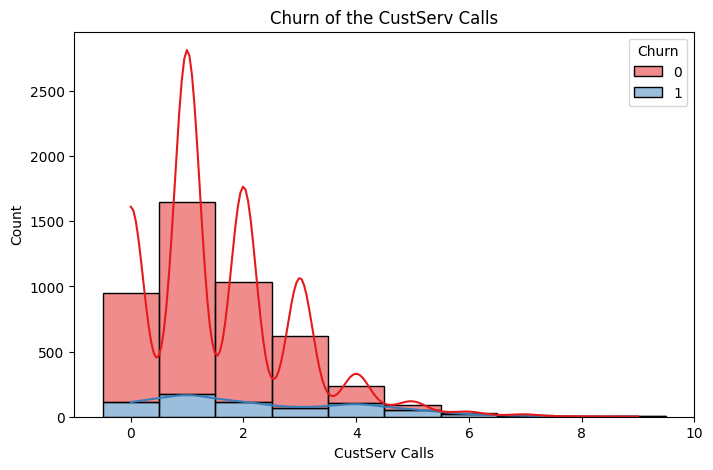

CustServ Calls
0    0.121977
1    0.106602
2    0.108632
3    0.105519
4    0.444444
5    0.617978
6    0.642857
7    0.538462
8    0.500000
9    1.000000
Name: Churn, dtype: float64


In [23]:
# plotting Churn with CustServ Calls

plt.figure(figsize=(8,5))
sns.histplot(data = data, x = 'CustServ Calls', hue = 'Churn',  palette = "Set1", multiple = "stack", discrete = True, kde = True)
plt.title("Churn of the CustServ Calls")
plt.show()

print(data.groupby('CustServ Calls')['Churn'].mean())

**Insights:**
1. Customers with greater than 4 CustServ Calls have higher proportion to churn.
2. Customers who are facing issues may likely to churn.

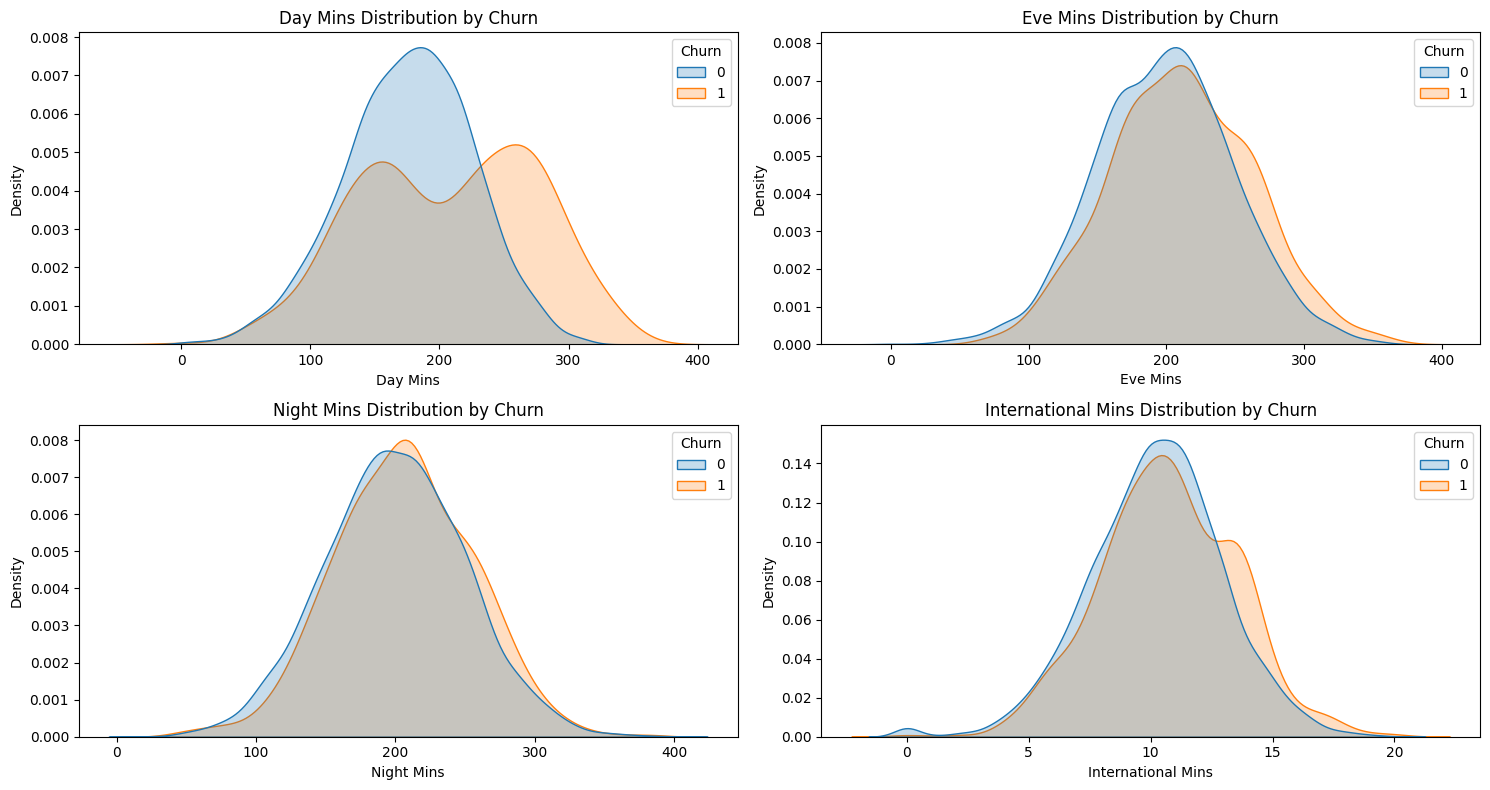

In [24]:
# Minutes Distribution with Churn

usage_cols = ["Day Mins","Eve Mins","Night Mins","International Mins"]

plt.figure(figsize = (15,8))
plotnumber = 1
for col in usage_cols:
    if plotnumber <=5:
        ax = plt.subplot(2,2,plotnumber)
        sns.kdeplot(data=data, x=col, hue='Churn', fill = True, common_norm = False)
        plt.title(f"{col} Distribution by Churn")
        plotnumber +=1
    plt.tight_layout()
plt.show()


**Insights:**
1) Day Minutes and International Minutes show clear differences → strong churn predictors.
2) Evening Minutes has moderate effect → churners use slightly more.
3) Night Minutes has no major effect → not useful for churn prediction.

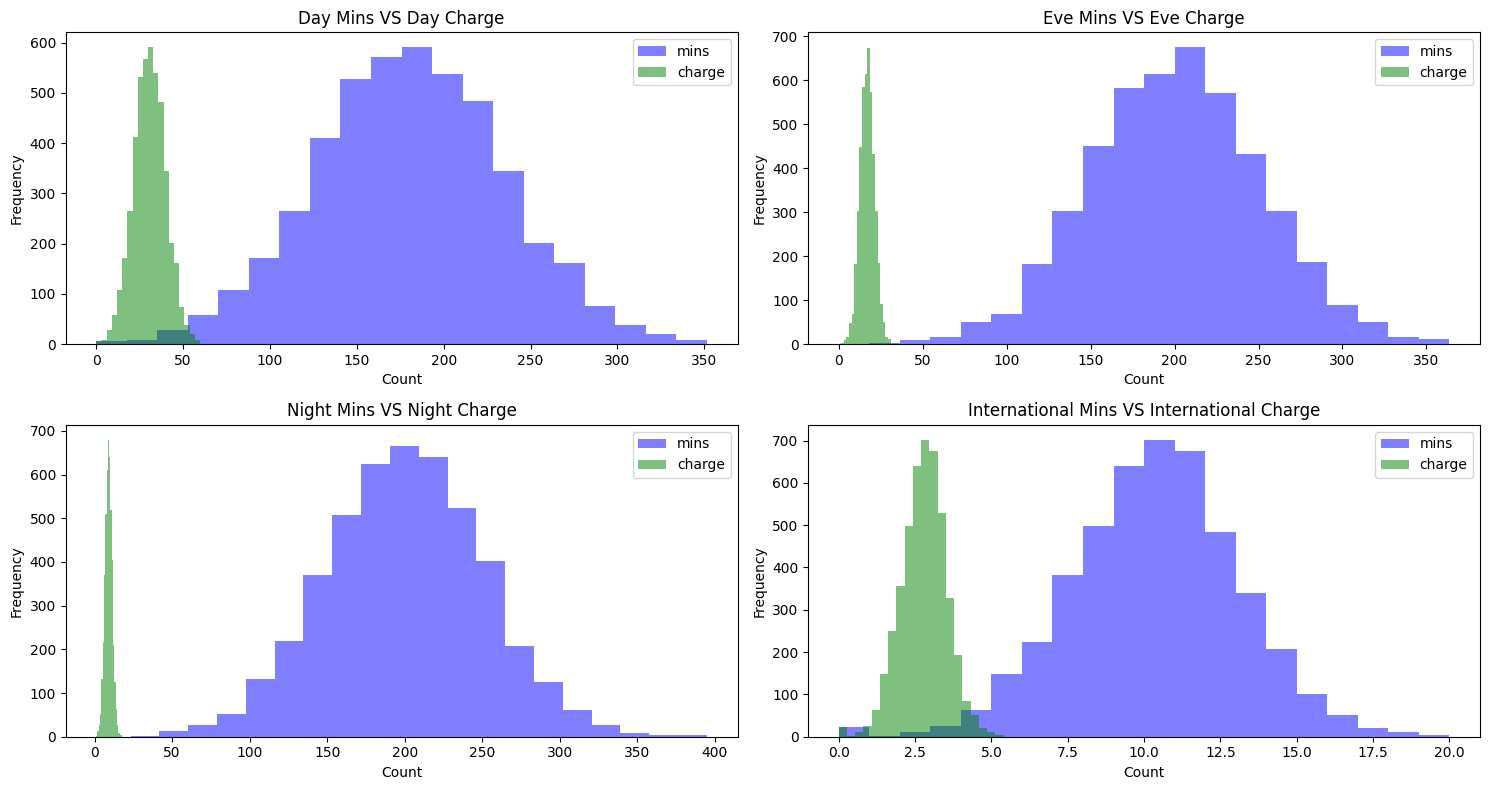

In [25]:
# Minutes with Charge

plt.figure(figsize=(15,8))
charge_cols = ['Day Charge', 'Eve Charge', 'Night Charge', 'International Charge']

for i in range(len(usage_cols)):
    plt.subplot(2,2, i+1)
    plt.hist(data[usage_cols[i]], bins = 20, alpha = 0.5, label = 'mins', color = 'blue')
    plt.hist(data[charge_cols[i]], bins = 20, alpha = 0.5, label = 'charge', color = 'green')
    plt.title(f'{usage_cols[i]} VS {charge_cols[i]}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

**Insights:**
1. Daytime and International charges are the churn-sensitive features.
2. Evening and Night usage don’t strongly contribute to churn.

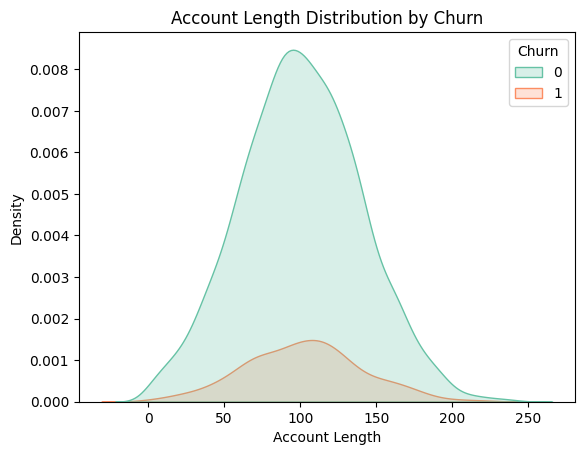

Churn
0    100.354456
1    102.400915
Name: Account Length, dtype: float64


In [26]:
# Account Length Distribution with Churn

sns.kdeplot(data = data, hue = 'Churn', x = 'Account Length', palette = 'Set2', fill = True)
plt.title('Account Length Distribution by Churn')
plt.show()

print(data.groupby('Churn')['Account Length'].mean())

**Insights:**

Account length distribution is almost identical for churners and non-churners, indicating account tenure has little impact on churn.

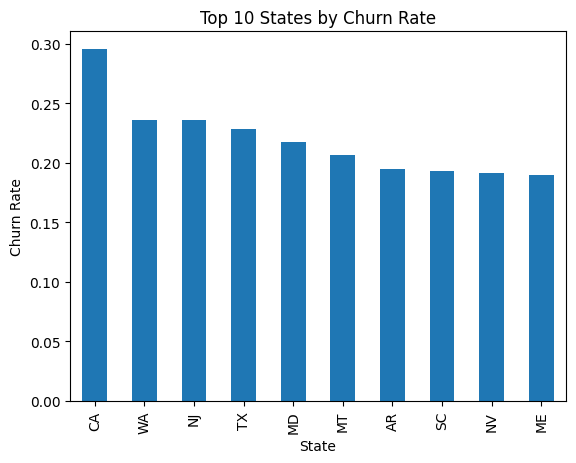

In [27]:
# plotting States with Churn

state_churn = data.groupby('State')['Churn'].mean().sort_values(ascending=False).head(10)
state_churn.plot(kind='bar')
plt.title("Top 10 States by Churn Rate")
plt.ylabel("Churn Rate")
plt.show()

**Insights:**

California shows the highest churn rate ~30%, while other states have relatively lower churn rates ~19%.

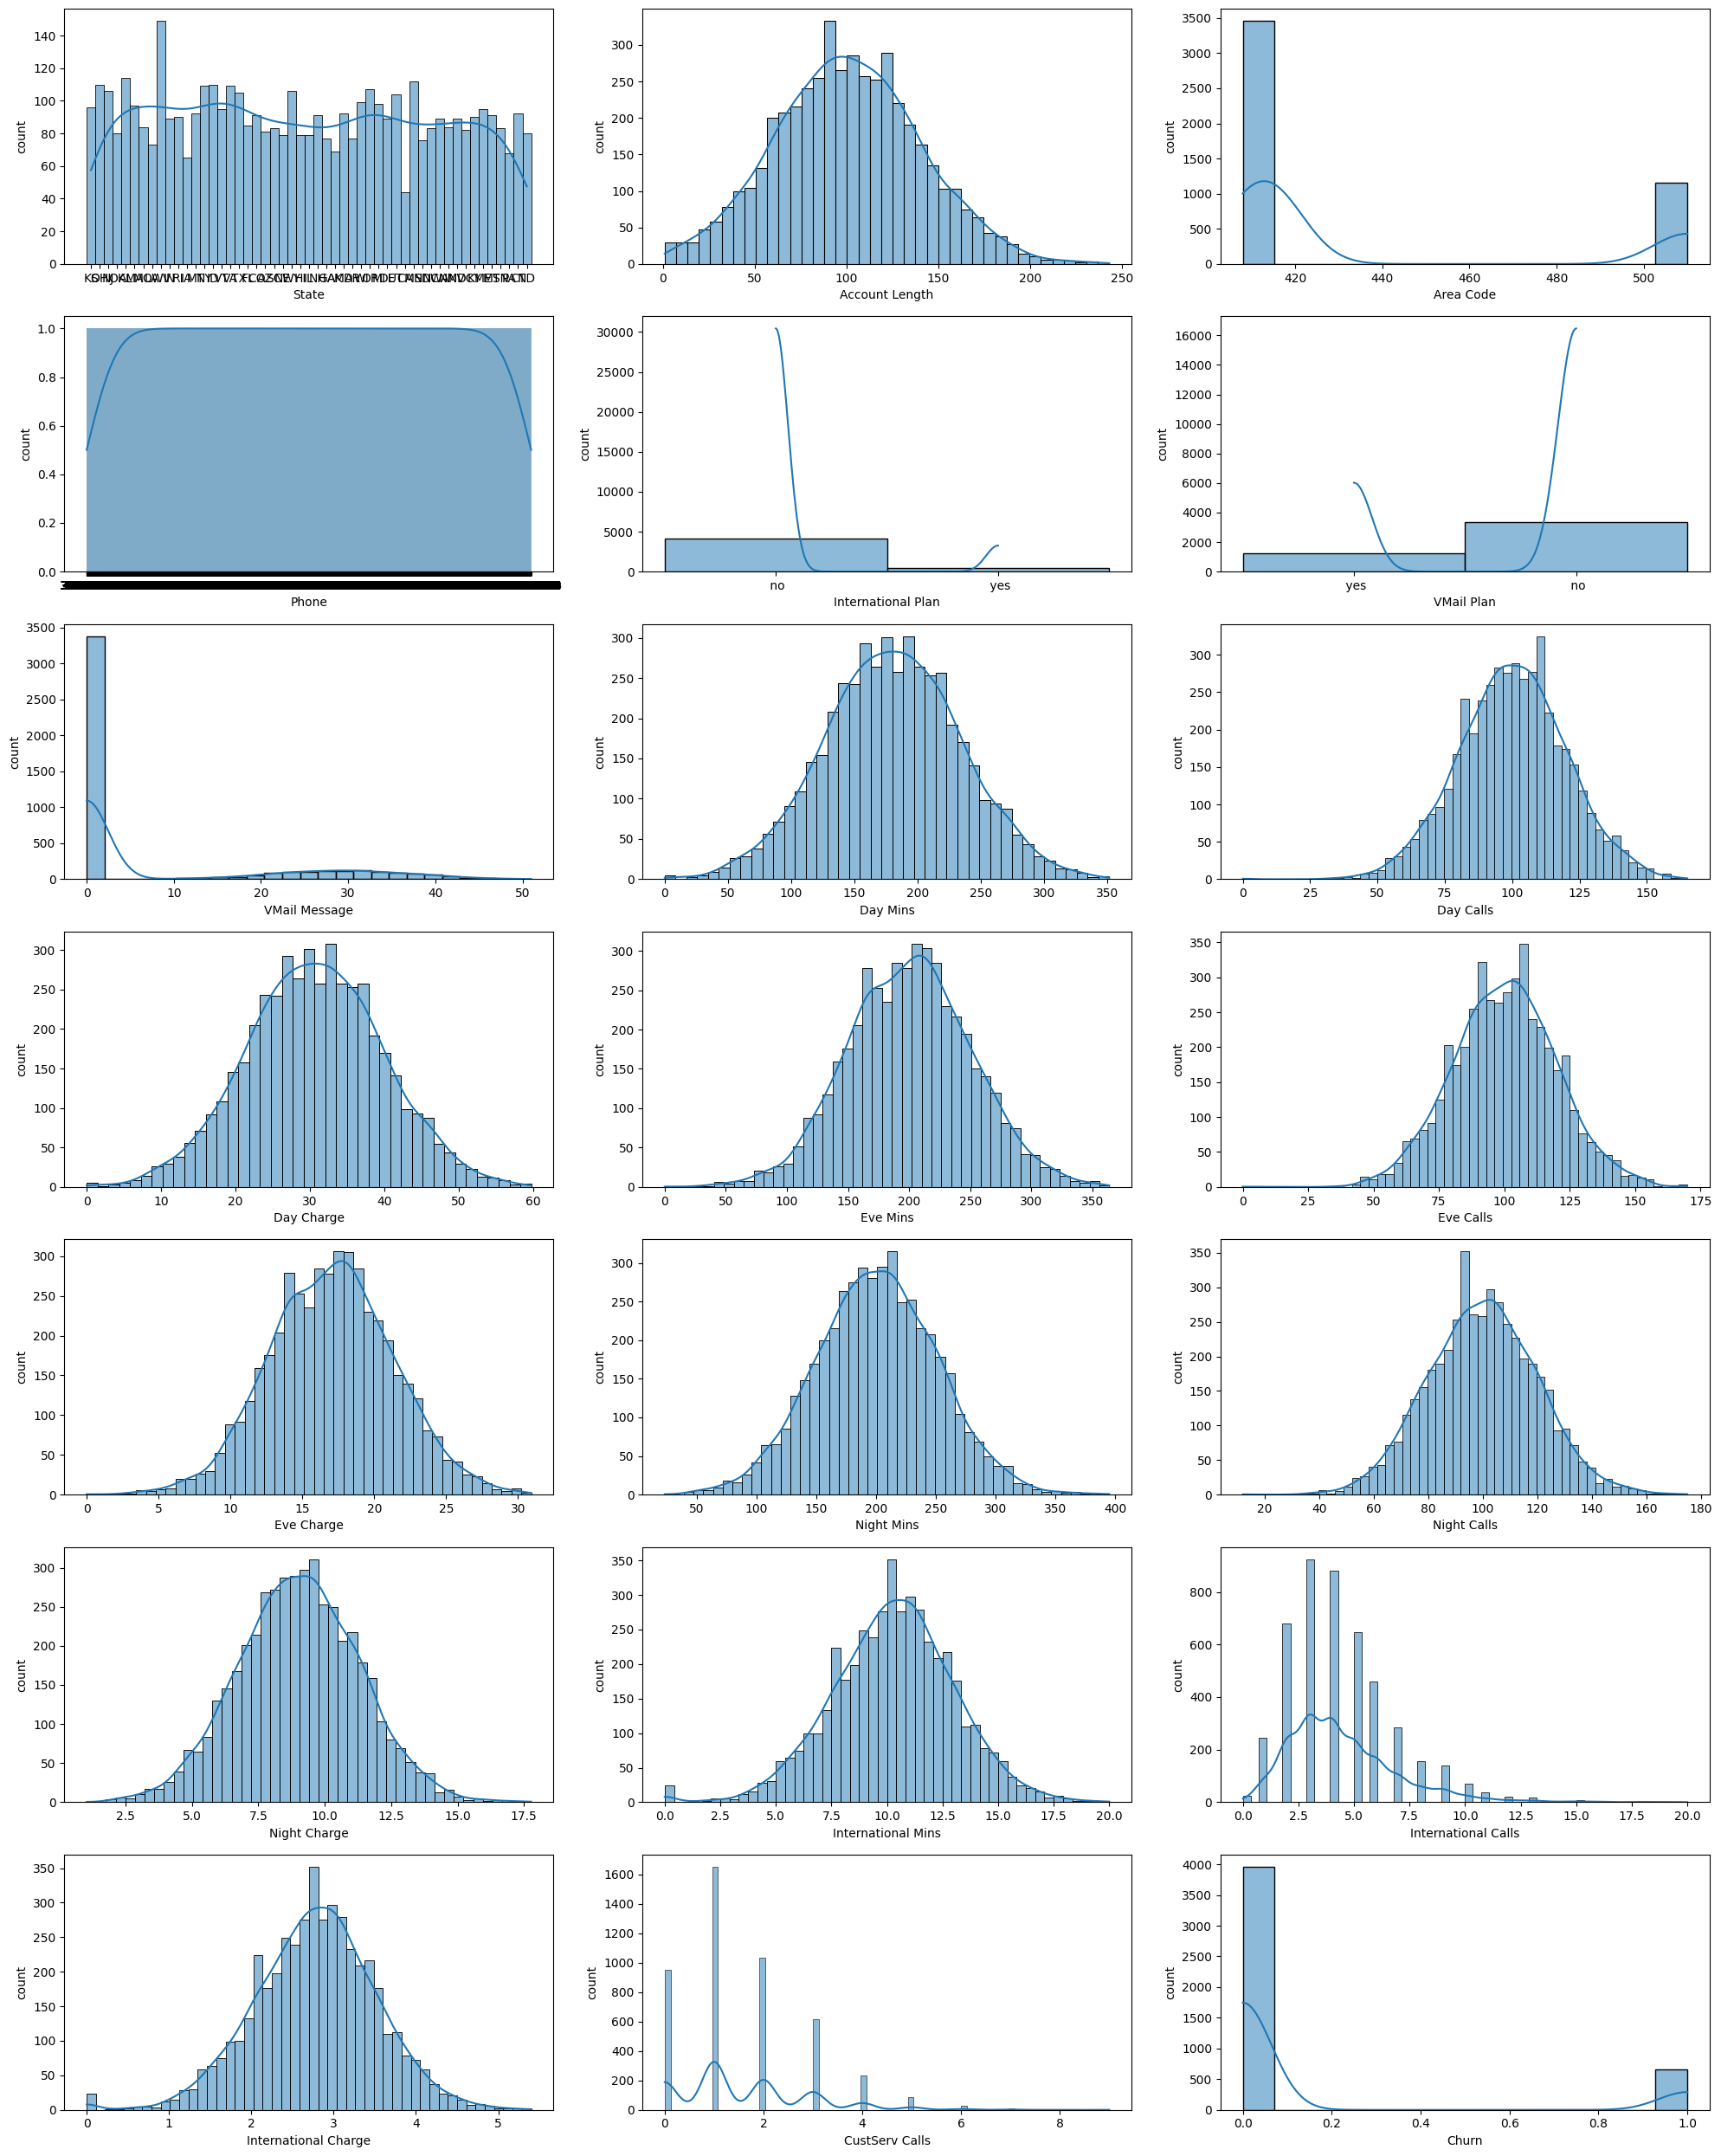

In [28]:
# plotting the Distribution of all Features

plt.figure(figsize = (20,25))
plotnumber = 1
for col in data:
    if plotnumber <= 21:
        ax = plt.subplot(7,3,plotnumber)
        sns.histplot(data[col], kde = True)
        plt.xlabel(col)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()
plt.show()

**Insights:**

1) Most numerical features like Day Minutes, Evening Minutes, Night Minutes, and their charges follow near-normal distributions, showing balanced usage patterns across customers.

2) International Plan and Voicemail Plan are categorical, with a majority of customers not subscribing to these services.

3) Customer Service Calls is right-skewed, with most customers making few calls, while a small group makes unusually high numbers of calls.

4) The Churn variable is highly imbalanced, with significantly more non-churners than churners.

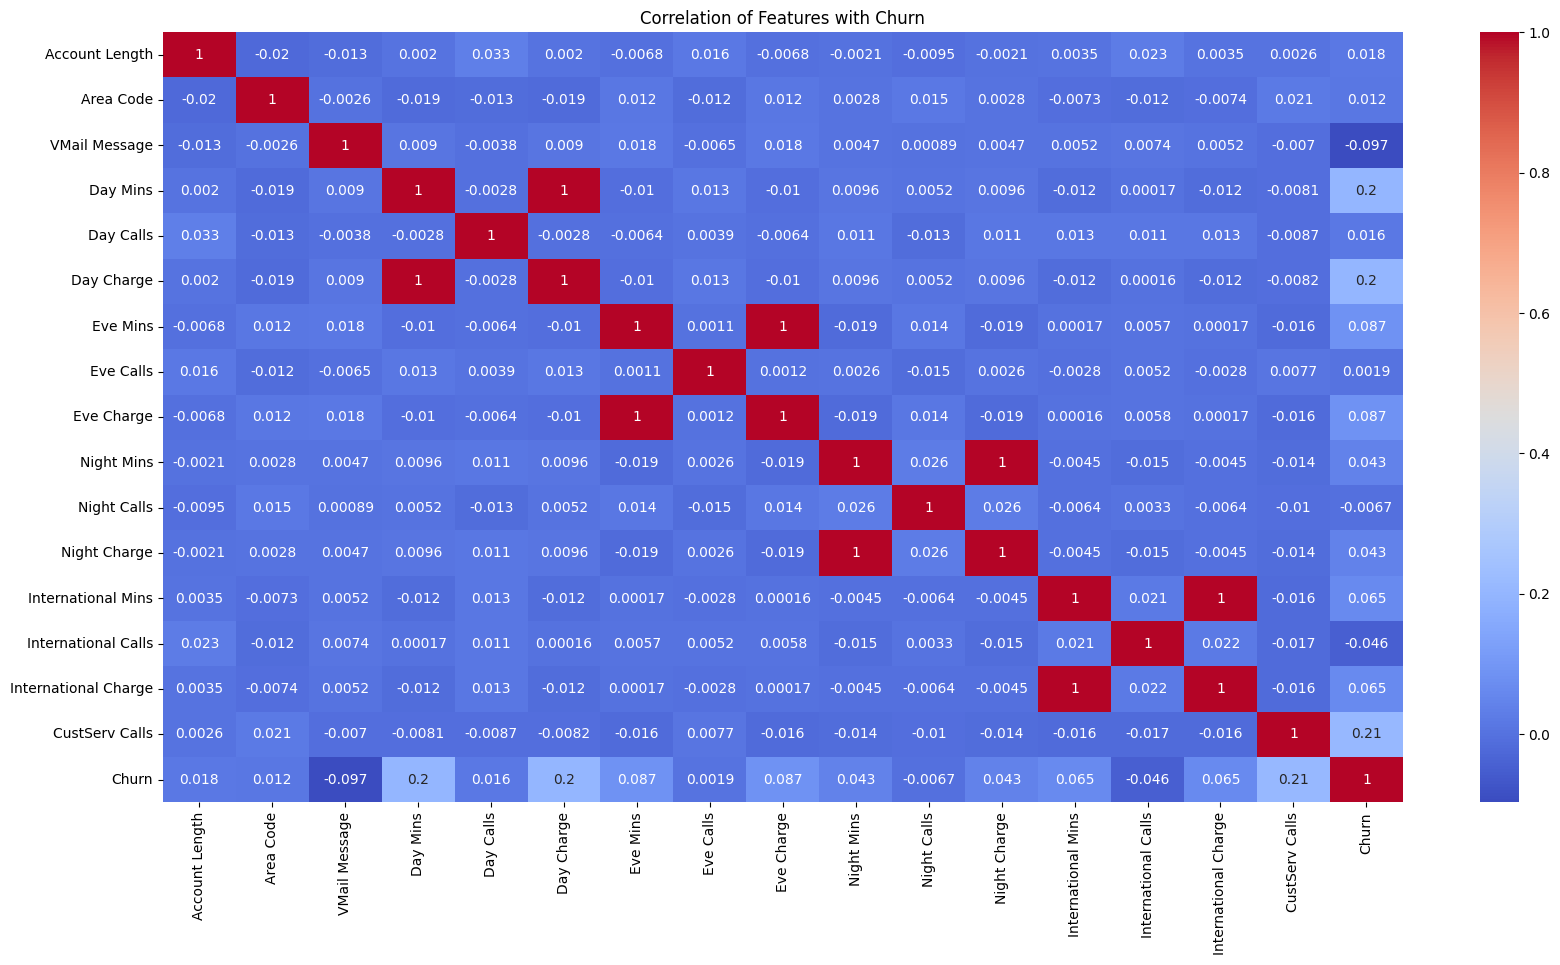

In [29]:
# plotting heatmap 

corr = data.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Churn")
plt.show()

**Insights:**

Since Charges are linear transformations of Minutes, they were removed to avoid redundancy and multicollinearity. This ensures the model learns independent signals without duplication.

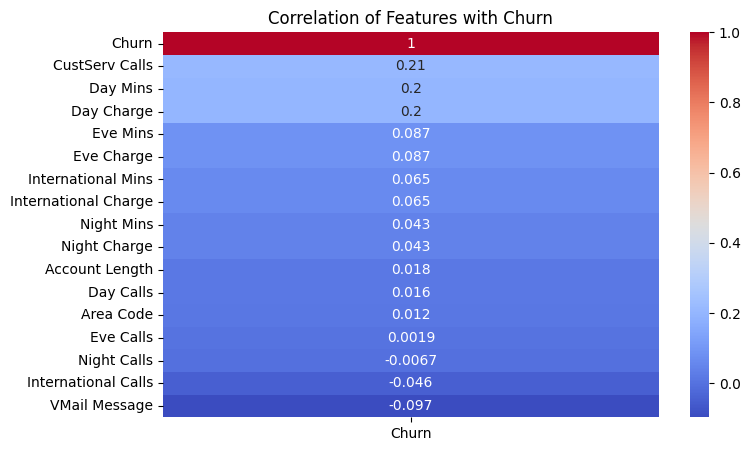

In [30]:
# plotting heatmap 

corr = data.corr(numeric_only = True)
plt.figure(figsize=(8,5))
sns.heatmap(corr[['Churn']].sort_values(by = 'Churn', ascending = False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Churn")
plt.show()

**Insights:**

1) Customer Service Calls (0.21), and Day Minutes (0.2) show the strongest positive correlations with churn, suggesting these are key drivers of customer attrition.

2) Vmail Message (-0.097) are negatively correlated with churn, indicating that customers using voicemail services are less likely to leave.

3) Other features such as Account Length, Area Code, Calls, and Charges show very weak correlations with churn (<0.1), meaning they may have limited predictive power individually.

### EDA Insights:
1) EDA revealed that International Plan, Customer Service Calls, and Day Minutes/Charges are key drivers of churn
2) Redundant variables (Charges, Voicemail Messages) and low-signal variables (Area Code, phone) were removed to simplify the model and reduce noise.

## Data Preprocessing

In [31]:
# Checking for the null values

data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

**This dataset has No Null Values**

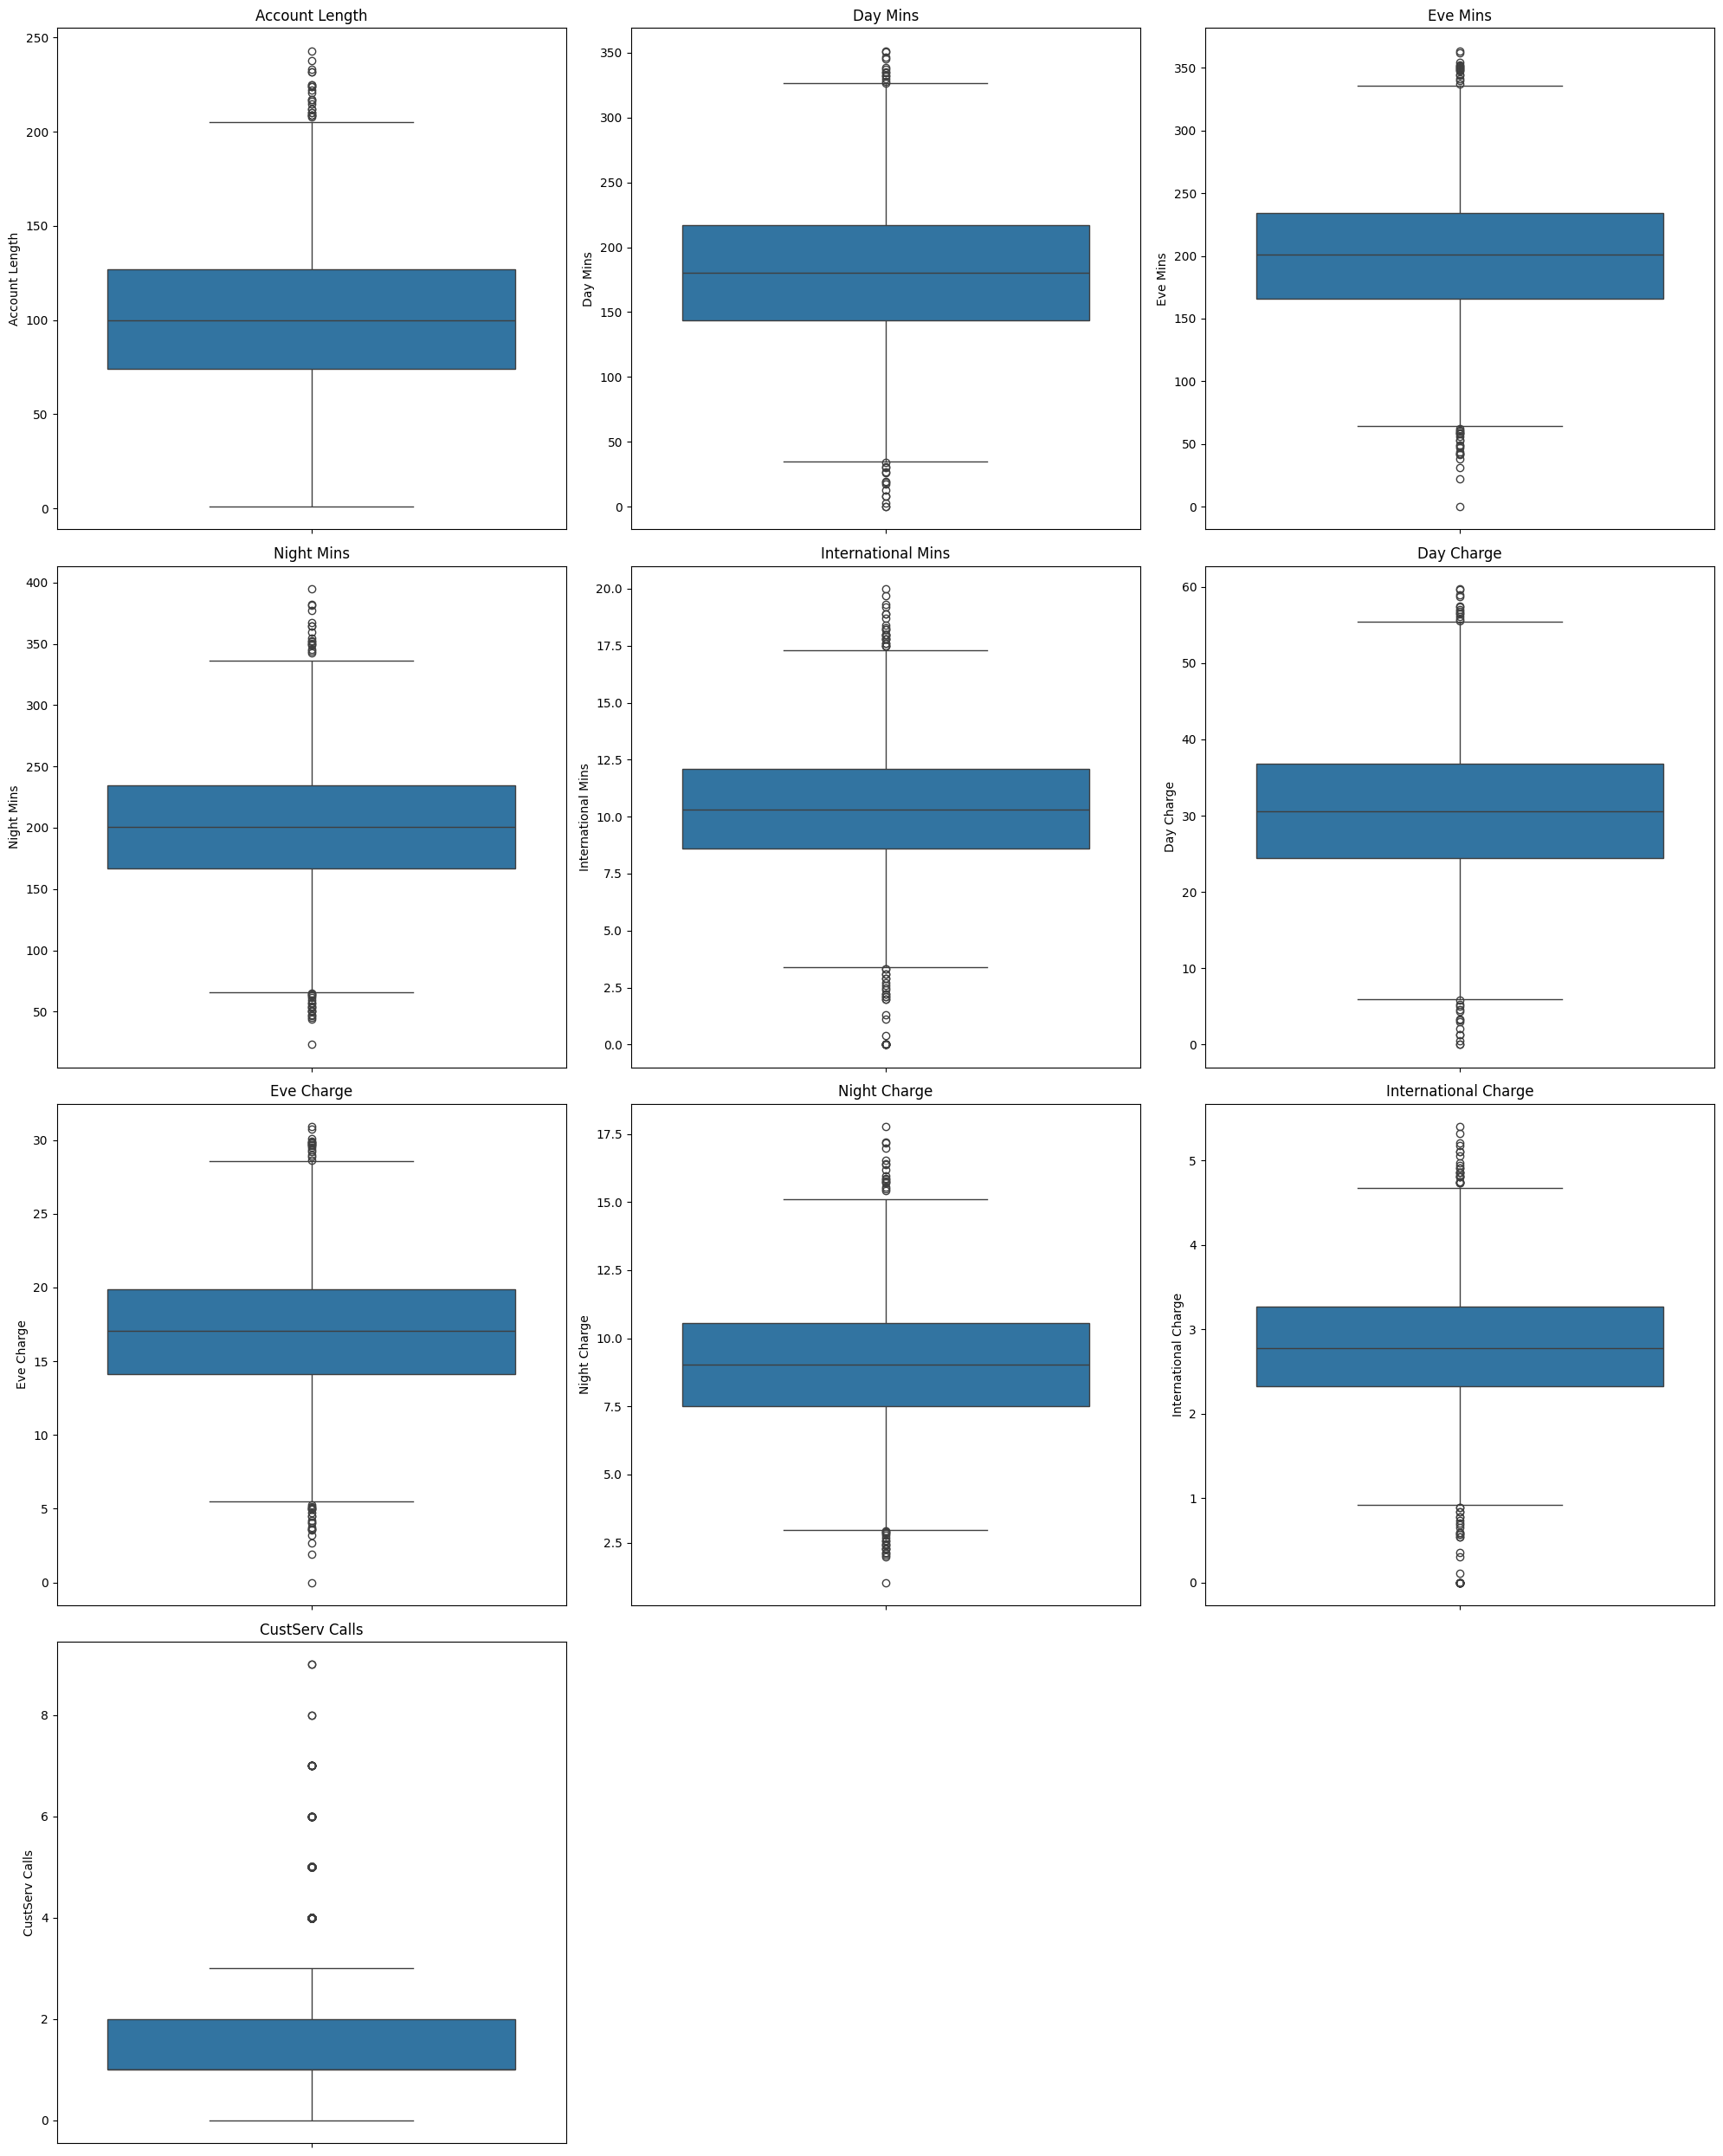

In [32]:
# Checking for the Outliers


outlier_cols = ["Account Length","Day Mins","Eve Mins","Night Mins","International Mins",
                "Day Charge","Eve Charge","Night Charge","International Charge","CustServ Calls"]

plt.figure(figsize=(20,25))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(4,3,i)
    sns.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


**Insights:**

Outlier analysis showed extreme values in CustServ Calls. while other high-usage outliers were retained as they represent genuine heavy users.

In [33]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers


# Loop through all numeric columns
for col in outlier_cols:
    outliers = detect_outliers_iqr(data, col)
    perc = len(outliers)/len(data)*100
    print(f"{col}: {len(outliers)} outliers ({perc:.2f}%)")


Account Length: 23 outliers (0.50%)
Day Mins: 27 outliers (0.58%)
Eve Mins: 36 outliers (0.78%)
Night Mins: 36 outliers (0.78%)
International Mins: 65 outliers (1.41%)
Day Charge: 27 outliers (0.58%)
Eve Charge: 36 outliers (0.78%)
Night Charge: 36 outliers (0.78%)
International Charge: 65 outliers (1.41%)
CustServ Calls: 368 outliers (7.97%)


**Insights:**

Most features show <1% outliers, but Customer Service Calls has the highest anomaly rate (7.97%)

In [34]:
# Cap outliers for CustServ Calls only

cap_value = 8
data['CustServ Calls'] = np.where(data['CustServ Calls'] > cap_value, cap_value, data['CustServ Calls'])


**Insights:**

Outlier analysis revealed that usage and charge features had small percentages of outliers, which were retained since they represent genuine high-usage customers critical for churn analysis. However, CustServ Calls showed nearly 8% outliers, with extremely high values likely reflecting anomalies rather than typical behavior. To reduce model distortion while preserving business meaning, CustServ Calls was capped at 8

### Feature Encoding

In [35]:
# Selecting the categorical data 

data.select_dtypes(include ='O').columns

Index(['State', 'Phone', 'International Plan', 'VMail Plan'], dtype='object')

**Insights:** 

State, Phone, International Plan, VMail Plan are categorical data it should convert into numerical for model building

In [36]:
# To see the unique values of the state

data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [37]:
# To see the unique values of the phone

data['Phone'].unique()

array([' 382-4657', ' 371-7191', ' 358-1921', ..., ' 338-4794',
       ' 355-8388', ' 409-6884'], dtype=object)

In [38]:
# To see the unique values of the International plan

data['International Plan'].unique()

array([' no', ' yes'], dtype=object)

In [39]:
# To see the unique values of the VMail Plan

data['VMail Plan'].unique()

array([' yes', ' no'], dtype=object)

In [40]:
# Converting the categorical into the Numerical using the Label Encoder

labelenc = LabelEncoder()
data['International Plan'] = labelenc.fit_transform(data['International Plan'])
data['VMail Plan'] = labelenc.fit_transform(data['VMail Plan'])
data['State'] = labelenc.fit_transform(data['State'])

**Insights:** 

1) Using Label Encoder to convert the features into Numerical because the features are binary output.
2) For State variable also we are using Label Encoder to reduce the formation of too many features.

In [41]:
# dropping Phone variable

data.drop('Phone', axis = 1, inplace = True)

**Insights:**

1) We are using Label Encoder for International Plan, VMail Phone and State to Encode them.
2) We Can ignore **Phone** because it doesn't impact the target **Churn**.

In [42]:
# Average cost per minute in Day, Eve, Night and International 

cost_per_min_day = data['Day Charge'] / data['Day Mins']
cost_per_min_eve = data['Eve Charge'] / data['Eve Mins']
cost_per_min_night = data['Night Charge'] / data['Night Mins']
cost_per_min_international = data['International Charge'] / data['International Mins']

avg_cost_day = cost_per_min_day.mean()
avg_cost_eve = cost_per_min_eve.mean()
avg_cost_night = cost_per_min_night.mean()
avg_cost_international = cost_per_min_international.mean()

print(f'Avg cost per minute in day: {avg_cost_day:.2f}')
print(f'Avg cost per minute in eve: {avg_cost_eve:.2f}')
print(f'Avg cost per minute in night: {avg_cost_night:.2f}')
print(f'Avg cost per minute in international: {avg_cost_international:.2f}')

Avg cost per minute in day: 0.17
Avg cost per minute in eve: 0.09
Avg cost per minute in night: 0.05
Avg cost per minute in international: 0.27


1) Average cost per minute for day calls is 0.17
2) Average cost per minute for international calls is 0.27

**We Can say that Day calls and International calls cost per minute are highly charging the customers** over Night and Evening

### Feature Scaling

In [43]:
# Splitting the data into X and Y
# X---> Independent variables
# Y--> Dependent variables

X = data.drop('Churn', axis = 1)    # I made changes here
y = data['Churn']

1) We split the data into X and y
2) X ---> Independent Features
3) y ---> Dependent Features

In [44]:
# Shape of X and Y features

print(f"Shape of X feature {X.shape}")
print(f"Shape of Y features {y.shape}")

Shape of X feature (4617, 19)
Shape of Y features (4617,)


In [45]:
# applying the StandardScaler to Normalize the data on the X data

scale = StandardScaler()
x_scaled = scale.fit_transform(X)

Using **StandardScaler** because the data is **evenly distributed and No Effective Outliers**

In [46]:
# Creating a datafrome scaled arrays

x_scaled = pd.DataFrame(x_scaled, columns = X.columns)

In [47]:
x_scaled.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
0,-0.679001,0.690901,-0.521392,-0.327000,1.653916,1.261885,1.568293,0.500261,1.568569,-0.059921,-0.059527,-0.059742,0.872135,-0.448712,0.871418,-0.101301,-0.583487,-0.102005,-0.434318
1,0.605758,0.160503,-0.521392,-0.327000,1.653916,1.335463,-0.349166,1.154156,-0.349447,-0.097506,0.142298,-0.096978,1.064069,0.153308,1.064889,1.240707,-0.583487,1.241481,-0.434318
2,0.335283,0.918214,-0.521392,-0.327000,-0.604626,-0.577587,1.166275,0.701460,1.166439,-1.567294,0.495492,-1.567818,-0.752381,0.203477,-0.751101,0.696649,0.230398,0.690651,-1.200850
3,0.605758,-0.420409,-0.686941,3.058107,-0.604626,-0.577587,2.203741,-1.461423,2.203911,-2.740354,-0.614545,-2.740765,-0.073686,-0.549048,-0.073952,-1.334498,1.044284,-1.338013,0.332214
4,0.673377,-0.647723,-0.521392,3.058107,-0.604626,-0.577587,-0.254682,0.651160,-0.254636,-1.031207,1.100966,-1.030217,-0.271556,1.056338,-0.271820,-0.065031,-0.583487,-0.061701,1.098746


In [48]:
# Combining of scaled features with target

data_scaled = pd.concat([x_scaled.reset_index(drop = True), y.reset_index(drop = True)], axis = 1)

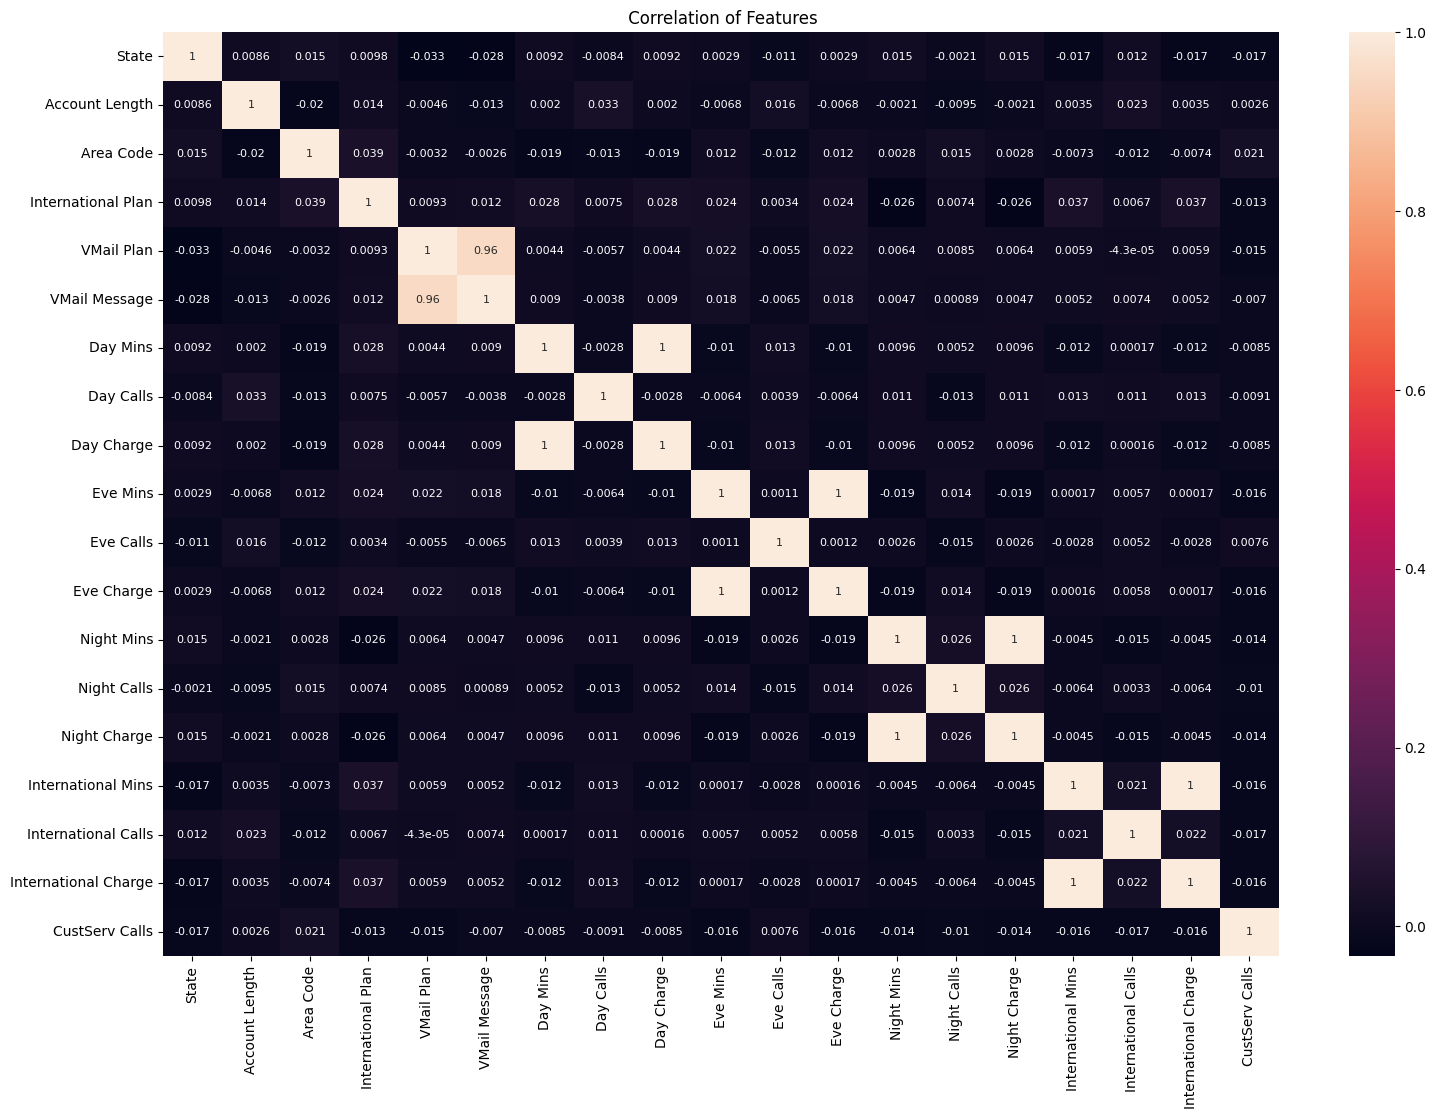

In [49]:
# Correlation of scaled features

plt.figure(figsize = (18,12))
sns.heatmap(x_scaled.corr(), annot = True, annot_kws={"size":8})
plt.title(" Correlation of Features")
plt.show()

**Insights:**

1) Day Charge, Eve Charge, Night Charge, and International Charge are almost perfectly correlated with their respective minutes features, so keeping both adds redundancy → removing charges avoids multicollinearity.

2) Vmail Message is highly correlated with Vmail Plan, indicating that customer with a voicemail plan tend to have more voice mail message, --> so removing it reduces redundancy too.

This helps simplify the model, reduce overfitting risk, and improve interpretability without losing much information.

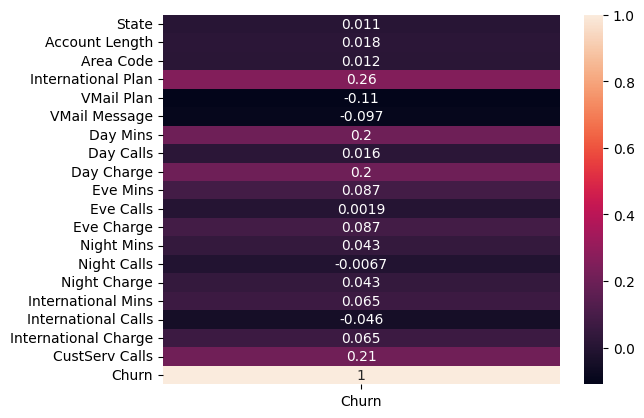

In [50]:
# Correlation of features with Churn

sns.heatmap(data_scaled.corr()[['Churn']], annot = True)
plt.show()

1) International Plan (0.26), Customer Service Calls (0.21), and Day Minutes (0.20) show the strongest positive correlations with churn, suggesting these are key drivers of customer attrition.

2) Vmail Plan (-0.11) and Vmail Message (-0.097) are negatively correlated with churn, indicating that customers using voicemail services are less likely to leave.

3) Other features such as Account Length, Area Code, Calls, and Charges show very weak correlations with churn (<0.1), meaning they may have limited predictive power individually.

In [51]:
# Removing the redundancy features

x_scaled.drop(['VMail Message','Day Charge','Eve Charge','Night Charge','International Charge'], axis = 1, inplace = True)

**We removed the 'VMail Message', 'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge' to reduce the noise in the data set**

### Train Test Split

In [52]:
# Train_Test_Split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

1) Splitting the data into training data and testing data using the train_test_split
2) Training data is 80%.
3) Testing data is 20%.

In [53]:
# Shape of Training data and Testing data

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (3693, 14) (3693,)
Test shape: (924, 14) (924,)


## Handling the Imbalanced data

In [54]:
# Handling the class Imbalance with SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()

1) SMOTE creates synthetic samples to balance minority and majority classes.
2) It helps prevent model bias caused by imbalanced datasets.
3) SMOTE improves classifier performance by oversampling the minority class. It generates new, realistic data points instead of simply duplicating existing ones.

In [55]:
# Resample of features using smote

x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [56]:
# Value count of y_smote

y_smote.value_counts()

Churn
1    3162
0    3162
Name: count, dtype: int64

1) Ensures no class imbalance remains in the target variable.
2) Confirms successful synthetic sample generation.

In [57]:
# Value count of y_test

y_test.value_counts()

Churn
0    799
1    125
Name: count, dtype: int64

## Model Building

### Model creation using the Logistic Regression

In [58]:
# initilize of Logistic Regression
lr_model = LogisticRegression()

Creates a Logistic Regression instance for training and evaluation.

In [94]:
# fitting the model with training data

lr_model.fit(x_smote, y_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
# Making predictions 

ypred_lr = lr_model.predict(x_test)

In [61]:
# Evaluating the model performance

y_train_pred = lr_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = lr_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Traning Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("Classification Report (Test Data)")
print(classification_report(y_test, ypred_lr))

Traning Accuracy: 0.79
Testing Accuracy: 0.75
Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.95      0.74      0.84       799
           1       0.32      0.78      0.45       125

    accuracy                           0.75       924
   macro avg       0.64      0.76      0.64       924
weighted avg       0.87      0.75      0.78       924



#### Logistic Regression Model Insights:

1) The model achieves 79% training accuracy and 75% testing accuracy, showing it generalizes reasonably well without overfitting.

2) It predicts the majority class (0) very accurately but has lower precision for the minority class (1), though recall is high.

3) Weighted F1-score is 0.78, indicating overall good performance, but the model can be improved for better balance between classes.

### Model Creation using the Support Vector Classifier

In [62]:
# Initilize of support vector Classifier

svc_model = SVC()

Creates a Support Vector Machine model for Training and Evaluation of the data

In [95]:
# fitting the model with the training data 

svc_model.fit(x_smote, y_smote)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [64]:
# Making predictions

ypred_svc = svc_model.predict(x_test)

In [65]:
# Evaluating the model performance

y_train_pred = svc_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = svc_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Traning Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("Classification Report (Test Data)")
print(classification_report(y_test, ypred_svc))

Traning Accuracy: 0.94
Testing Accuracy: 0.89
Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       799
           1       0.56      0.68      0.62       125

    accuracy                           0.89       924
   macro avg       0.76      0.80      0.77       924
weighted avg       0.90      0.89      0.89       924



#### Support Vecotor Machine Insights:

1) The model achieves 94% training accuracy and 88% testing accuracy, indicating it generalizes well without overfitting.

2) It performs very well on the majority class (0) but has lower precision for the minority class (1), though recall is reasonably high.

3) Overall, the weighted F1-score of 0.89 shows strong performance, with room to improve minority class predictions.

### Model Creation Using Decision Trees

In [66]:
# Initilize of Decision Tree Classifier

dt_model = DecisionTreeClassifier()

In [96]:
# fitting the model with training data

dt_model.fit(x_smote, y_smote)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
# Making predictions

ypred_dt = dt_model.predict(x_test)

In [69]:
# Evaluating the model performance

y_train_pred = dt_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = dt_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Traning Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("Confusion Materix")
print(confusion_matrix(y_test, ypred_dt))

print("Classification Report (Test Data)")
print(classification_report(y_test, ypred_dt))

Traning Accuracy: 1.00
Testing Accuracy: 0.88
Confusion Materix
[[723  76]
 [ 32  93]]
Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       799
           1       0.55      0.74      0.63       125

    accuracy                           0.88       924
   macro avg       0.75      0.82      0.78       924
weighted avg       0.90      0.88      0.89       924



#### Decision Tree Insights:

1) The model shows high overall accuracy (90%), but the minority class (1) has lower precision (0.60), indicating some false positives.
2) Recall for class 1 is relatively strong (0.81), meaning the model detects most positive cases despite imbalance.

### Model Creation using RandomForestClassifier

In [70]:
# Initilize of RandomForestClassifier

rf_model = RandomForestClassifier()

In [97]:
# fitting the model with the training data

rf_model.fit(x_smote, y_smote)

,n_estimators,300
,criterion,'gini'
,max_depth,7
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
# Making predictions

ypred_rf = rf_model.predict(x_test)

In [73]:
# Evaluating the Model performance

y_train_pred = rf_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = rf_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("Confusion Materix")
print(confusion_matrix(y_test, ypred_rf))

print("Classification Report (Test Data)")
print(classification_report(y_test, ypred_rf))

Training Accuracy: 1.00
Testing Accuracy: 0.95
Confusion Materix
[[778  21]
 [ 26  99]]
Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       799
           1       0.82      0.79      0.81       125

    accuracy                           0.95       924
   macro avg       0.90      0.88      0.89       924
weighted avg       0.95      0.95      0.95       924



#### RandomForestClassifier Insights:
1) The Random Forest model achieved excellent performance with 95% testing accuracy, showing strong generalization.
2) Both classes are well captured, with high precision and recall for majority (0.97) and balanced metrics for minority (0.82).
3) The model effectively handles class imbalance, providing reliable predictions across classes.

### Hyperparameter Tuning of RandomForestClassifier

In [74]:
# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [3, 5, 7],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [3, 7, 5], 
}

# grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
Best Score: 0.9138707840308875


In [98]:
# Re_Initilize of the RandomForestClassifier for hyperparameter tuning

rf_model = RandomForestClassifier(max_depth = 7, max_features = 7, min_samples_leaf = 2, min_samples_split = 7, n_estimators = 200)

# Fitting the model with training data
rf_model.fit(x_smote, y_smote)

# Making predictions
ypred_rf = rf_model.predict(x_test)

# Evaluating the Model Performance
y_train_pred = rf_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = rf_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("Confusion Materix")
print(confusion_matrix(y_test, ypred_rf))

print("Classification Report (Test Data)")
print(classification_report(y_test, ypred_rf))

Training Accuracy: 0.93
Testing Accuracy: 0.94
Confusion Materix
[[758  41]
 [ 18 107]]
Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       799
           1       0.72      0.86      0.78       125

    accuracy                           0.94       924
   macro avg       0.85      0.90      0.87       924
weighted avg       0.94      0.94      0.94       924



#### Insights for RandomForestClassifier with hyperparameter tuning

1) After hyperparameter tuning, the RandomForestClassifier’s training accuracy dropped slightly (1.00 → 0.93), indicating reduced overfitting.
2) The tuned model improved recall for the minority class (0.80 → 0.86) and achieved better class balance.
3) However, precision for class 1 decreased (0.81 → 0.69), showing more false positives.
4) Overall, tuning improved generalization and minority class detection, at the cost of slightly lower overall precision.

#### Model Creation using the Gradient Boosting 

In [76]:
# Initilize of Gradient Boosting Classifier

gb_model = GradientBoostingClassifier()

In [99]:
# fitting the model with training data

gb_model.fit(x_smote, y_smote)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [78]:
# Making predictions

ypred_gb = gb_model.predict(x_test)

In [79]:
# Evaluating the Model performance

y_train_pred = gb_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = gb_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy {train_acc:.2f}')
print(f'Testing Accuracy {train_acc:.2f}')

print("Confusion Materix")
print(confusion_matrix(y_test, ypred_gb))

print("Calssification Report (Test Data)")
print(classification_report(y_test, ypred_gb))

Training Accuracy 0.96
Testing Accuracy 0.96
Confusion Materix
[[769  30]
 [ 23 102]]
Calssification Report (Test Data)
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       799
           1       0.77      0.82      0.79       125

    accuracy                           0.94       924
   macro avg       0.87      0.89      0.88       924
weighted avg       0.94      0.94      0.94       924



#### Insights:

1) Gradient Boosting achieved strong performance with 96% training accuracy and 94% testing accuracy.
2) The model classified the majority class with high precision and recall (0.97, 0.96), while the minority class reached an F1-score of 0.80.
3) Overall, it shows good generalization with balanced performance across classes

#### Hyperparameter tuning of Gradient Boosting Classifier

In [80]:
# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# grid Search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.9583725706383847


In [81]:
# Re-Initilize GradientBoostingClassifier for hyperparameter tuning

gb_model = GradientBoostingClassifier( learning_rate = 0.1, max_depth = 5, n_estimators = 300)

# fitting the model with training data
gb_model.fit(x_smote, y_smote)

# Making predictions 
ypred_gb = gb_model.predict(x_test)

# Evaluating the Model Performace
y_train_pred = gb_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = gb_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy {train_acc:.2f}')
print(f'Testing Accuracy {train_acc:.2f}')

print("Confusion Materix")
print(confusion_matrix(y_test, ypred_gb))

print("Calssification Report (Test Data)")
print(classification_report(y_test, ypred_gb))

Training Accuracy 1.00
Testing Accuracy 1.00
Confusion Materix
[[786  13]
 [ 27  98]]
Calssification Report (Test Data)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.88      0.78      0.83       125

    accuracy                           0.96       924
   macro avg       0.92      0.88      0.90       924
weighted avg       0.96      0.96      0.96       924



#### Insights for GradientBoostingClassifier with Hyperparameter tuning

1) Hyperparameter tuning improved both training (0.96 → 1.00) and testing accuracy (0.94 → 0.96).
2) The tuned model achieved higher recall for the majority class (0.96 → 0.98) and better precision for the minority class (0.78 → 0.86).
3) Class 1 recall remained stable (0.82), but its F1-score improved (0.80 → 0.84), showing more balanced performance.
4) The confusion matrix indicates fewer misclassifications overall after tuning.
5) Thus, tuning enhanced generalization and minority class detection, while slightly reducing false negatives.

#### Model Creation With XGBClassifier

In [100]:
from xgboost import XGBClassifier

# Initilize of XGBClassifier
xgb_model = XGBClassifier()

# fitting the model with the training data
xgb_model.fit(x_smote, y_smote)

# Making Predictions
ypred_xgb = xgb_model.predict(x_test)

#Evaluating the Model Performace
y_train_pred = xgb_model.predict(x_smote)
train_acc = accuracy_score(y_smote, y_train_pred)

y_test_pred = xgb_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy {train_acc:.2f}')
print(f'Testing Accuracy {train_acc:.2f}')

print('Confusion matrix')
print(confusion_matrix(y_test, ypred_xgb))

print("Calssification Report (Test Data)")
print(classification_report(y_test, ypred_xgb))

Training Accuracy 1.00
Testing Accuracy 1.00
Confusion matrix
[[787  12]
 [ 24 101]]
Calssification Report (Test Data)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       799
           1       0.89      0.81      0.85       125

    accuracy                           0.96       924
   macro avg       0.93      0.90      0.91       924
weighted avg       0.96      0.96      0.96       924



#### Insights for XGBClassifier

1) The XGBClassifier achieved perfect training and testing accuracy (1.00), with strong performance on both classes.
2) Class 0 showed very high precision and recall (0.98 each), while Class 1 also performed well with improved F1-score (0.85).
3) Overall, the model demonstrates excellent generalization and balanced classification, with minimal misclassifications

#### Hyperparameter tuning of XGBClassifier

In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 5],
    'reg_alpha': [0, 1]
}


In [84]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',   
    cv=3,                 
    verbose=2,
    n_jobs=-1
)


In [85]:
grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.8}
Best Score: 0.9645021168716265


In [86]:
best_xgb = grid_search.best_estimator_

# Fit on training data
best_xgb.fit(x_smote, y_smote)

# Predictions
y_train_pred = best_xgb.predict(x_smote)
y_test_pred = best_xgb.predict(x_test)

# Evaluation
print(f"Training Accuracy: {accuracy_score(y_smote, y_train_pred):.2f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.00
Testing Accuracy: 0.96
Confusion Matrix:
 [[783  16]
 [ 25 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       799
           1       0.86      0.80      0.83       125

    accuracy                           0.96       924
   macro avg       0.92      0.89      0.90       924
weighted avg       0.95      0.96      0.95       924



#### Insights:

1) After hyperparameter tuning, xgbclassifier reduced in false positives.
2) Overall accuracy remained strong (~0.96), with better balance between class 0 and class 1 predictions.
3) The confusion matrix shows fewer misclassifications after tuning, especially for the majority class.

### Model Creation with Neural Network

In [87]:
# Import libraries

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [88]:
# Initilize of the NN Model

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# fitting the model with training data

model.fit(x_smote, y_smote, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9538 - loss: 0.1217 - val_accuracy: 0.8972 - val_loss: 0.3165
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9579 - loss: 0.1176 - val_accuracy: 0.9015 - val_loss: 0.3069
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.1080 - val_accuracy: 0.8961 - val_loss: 0.3267
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.0988 - val_accuracy: 0.8994 - val_loss: 0.3209
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9670 - loss: 0.0975 - val_accuracy: 0.8929 - val_loss: 0.3321
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.0907 - val_accuracy: 0.8983 - val_loss: 0.3238
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.0864 - val_accuracy: 0.8994 - val_loss: 0.3316
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0810 - val_accuracy: 0.

We fit a neural network model with the trainig data

In [91]:
# Evaluating the model performance

accuracy = model.evaluate(x_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9049 - loss: 0.2999


In [92]:
# Making predictions

ypred_ann = model.predict(x_test)
y_pred = (ypred_ann > 0.5) .astype(int)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


## Model Comparsion:

In [103]:
model_names = ["XGBClassifier", "Random Forest", 'Gradient Boosting','ANN', 'Decision Tree', 'Support Vector Classifier', 'Logistic Regression']
model_functions = [xgb_model.predict, rf_model.predict, gb_model.predict, model.predict, dt_model.predict, svc_model.predict, lr_model.predict]

metrics_dfs = []

for name, predict_fn in zip(model_names, model_functions):
    raw_predictions = predict_fn(x_test)
    binary_predictions = (raw_predictions > 0.5).astype(int)
    
    report = classification_report(y_test, binary_predictions, output_dict=True)
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]
    accuracy = accuracy_score(y_test, binary_predictions)
    
    model_metrics_df = pd.DataFrame({"Model": [name], "Precision": [precision], "Recall": [recall], "F1-Score": [f1], "Accuracy": [accuracy]})
    metrics_dfs.append(model_metrics_df)

metrics_df = pd.concat(metrics_dfs, ignore_index=True)

print(metrics_df)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                       Model  Precision  Recall  F1-Score  Accuracy
0              XGBClassifier   0.893805   0.808  0.848739  0.961039
1              Random Forest   0.722973   0.856  0.783883  0.936147
2          Gradient Boosting   0.892857   0.800  0.843882  0.959957
3                        ANN   0.551948   0.680  0.609319  0.882035
4              Decision Tree   0.536313   0.768  0.631579  0.878788
5  Support Vector Classifier   0.562914   0.680  0.615942  0.885281
6        Logistic Regression   0.320132   0.776  0.453271  0.746753


### Insights:

1) We had build many models using different algorithms like Logistic, SVC, Decision Trees, Random Forest, Gradient Boosting, XGB, ANN.
2) By comparing all the models **XGBClassifier** performing well with the data with ~96% of Accuracy, ~85% of F1-Score.
3) We are choosing XGBClassifier as our production model.

### Using XGBClassifer

In [104]:
# Getting the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Feature importance
importances = best_xgb.feature_importances_
features = x_smote.columns

# Creating DataFrame
df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Top 10 Features:\n", df.head(10))

Top 10 Features:
                 Feature  Importance
3    International Plan    0.277155
13       CustServ Calls    0.146785
4            VMail Plan    0.132259
2             Area Code    0.098871
5              Day Mins    0.082446
12  International Calls    0.081677
7              Eve Mins    0.042738
11   International Mins    0.040340
9            Night Mins    0.024308
0                 State    0.016362


**The above are the top 10 features from the dataset which helps in predicting the churn.**

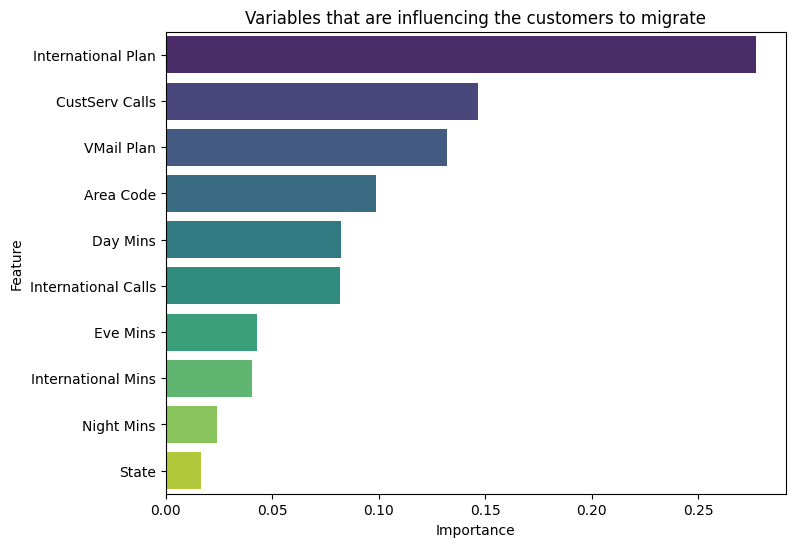

In [105]:
# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=df.head(10), palette="viridis")
plt.title("Variables that are influencing the customers to migrate")
plt.show()

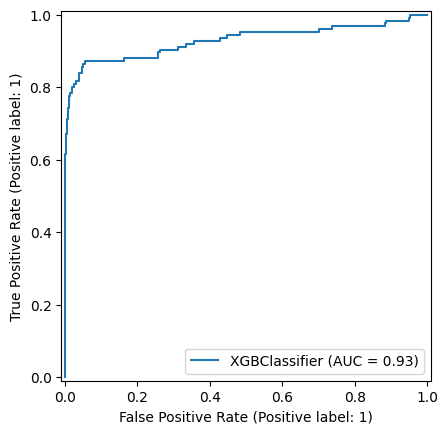

In [106]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_xgb, x_test, y_test)
plt.show()


The Accuracy of the ROC with XGBClassifier is ~93%

# Project Goals:

## 1. Understanding the variables that are influencing the customers to migrate.

## Key Variables Influencing Customer Migration:

Based on the analysis, the following variables were identified as the **strongest drivers of churn**:

1. **Customer Service Calls**  
   - Customers with frequent service calls are more likely to leave.  
   - This indicates dissatisfaction with service quality or unresolved issues.  

2. **International Plan**  
   - Customers subscribed to an international plan have higher churn probability.  
   - This suggests pricing or service quality issues in international calls.  

3. **Day & International Call Mins**  
   - Higher usage during day increases churn risk.  
   - Customers may be exploring cheaper alternatives from competitors.  

4. **Voice Mail Plan**  
   - Customers without a voicemail plan show slightly higher churn.  
   - Indicates that value-added services play a role in retention.
     
5. **Charges**
   - Overall higher monthly charges correlate with churn.  
   - Price sensitivity is a key factor influencing customer decisions.  


Customers are more likely to migrate if they make **frequent service calls, pay high charges, or hold international plans**. These insights help the business design **targeted retention offers** and improve **customer satisfaction strategies**.  


## 2. Creating Churn risk scores that can be indicative to drive retention campaigns.

In [107]:

#  Predict churn probabilities ( Churn risk scores)
churn_prob = best_xgb.predict_proba(x_test)[:, 1]  # probability of churn (class 1)

#  Predict churn flag (YES = 1, NO = 0)
y_pred = best_xgb.predict(x_test)

#  Creating a DataFrame with Churn Flag, and Risk Score
test_results = pd.DataFrame({
    "CHURN_FLAG": y_pred,
    "Churn_Risk_Score": churn_prob
})


# Show first 10 predictions
print("Sample Predictions:")
print(test_results.head(10))


Sample Predictions:
   CHURN_FLAG  Churn_Risk_Score
0           0          0.003758
1           0          0.002505
2           0          0.007659
3           0          0.006912
4           0          0.172939
5           0          0.003953
6           0          0.009679
7           1          0.690834
8           0          0.004336
9           0          0.036483


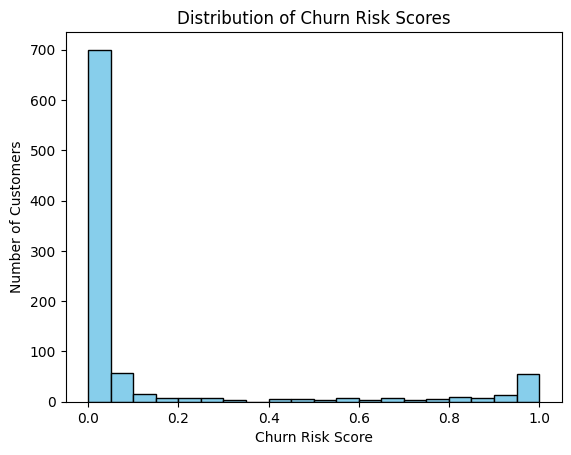

In [108]:
# Distribution of Churn Risk Score
plt.hist(test_results["Churn_Risk_Score"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Churn Risk Score")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churn Risk Scores")
plt.show()


#### Insights:

Look at the histogram of risk scores:

1) Many customers at low scores (0.0–0.3) → most customers are safe.
2) Large chunk in mid-range (0.4–0.6) → these are “maybe churners,” and campaigns can really help.
3) Customers at high risk (>0.7) → very likely to churn; need urgent retention action.

From the plot, most customers have churn risk scores close to 0 (very low churn probability), while a smaller group has scores close to 1 (very high churn probability).
This indicates our model clearly separates loyal customers from those highly likely to churn, with few in the mid-risk range.

In [112]:
def risk_bucket(score):
    if score < 0.3:
        return "Low Risk"
    elif score < 0.6:
        return "Medium Risk"
    else:
        return "High Risk"

test_results["Risk_Bucket"] = test_results["Churn_Risk_Score"].apply(risk_bucket)
print(test_results.head(20))


    CHURN_FLAG  Churn_Risk_Score Risk_Bucket
0            0          0.003758    Low Risk
1            0          0.002505    Low Risk
2            0          0.007659    Low Risk
3            0          0.006912    Low Risk
4            0          0.172939    Low Risk
5            0          0.003953    Low Risk
6            0          0.009679    Low Risk
7            1          0.690834   High Risk
8            0          0.004336    Low Risk
9            0          0.036483    Low Risk
10           0          0.000652    Low Risk
11           0          0.020733    Low Risk
12           0          0.090422    Low Risk
13           0          0.000267    Low Risk
14           1          0.956835   High Risk
15           0          0.000451    Low Risk
16           0          0.013170    Low Risk
17           0          0.018294    Low Risk
18           0          0.029676    Low Risk
19           0          0.005165    Low Risk


## Churn Risk Score:

The **Churn Risk Score** is a probability value (between 0 and 1) generated by the model that indicates **how likely a customer is to migrate**.  

- A score **close to 1** → Very high chance of churn (customer is at serious risk of leaving).  
- A score **close to 0** → Very low chance of churn (customer is likely to stay).  

#### How It Helps the Business:
1. **Customer Segmentation**  
   - High-risk customers (e.g., score > 0.7) → Require immediate retention offers.  
   - Medium-risk customers (0.4 – 0.6) → Monitor closely and engage with personalized campaigns.  
   - Low-risk customers (< 0.4) → Maintain with regular loyalty programs.  

2. **Early Intervention**  
   - Risk scores act as an **early warning system**.  
   - Businesses can reach out to at-risk customers before they actually decide to leave.  

The churn risk score provides a **proactive approach** by predicting churn likelihood, enabling the business to **retain valuable customers** through targeted, cost-effective strategies.  


### 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

In [113]:
#  Predict churn flag (YES = 1, NO = 0)
y_pred = best_xgb.predict(x_test)

#  Creating a DataFrame with Churn Flag, and Risk Score
test_results = pd.DataFrame({
    "CHURN_FLAG": y_pred,
    "Churn_Risk_Score": churn_prob
})


# Show first 10 predictions
print("Sample Predictions:")
print(test_results.head(10))


Sample Predictions:
   CHURN_FLAG  Churn_Risk_Score
0           0          0.003758
1           0          0.002505
2           0          0.007659
3           0          0.006912
4           0          0.172939
5           0          0.003953
6           0          0.009679
7           1          0.690834
8           0          0.004336
9           0          0.036483


In [114]:
#  Check how many customers flagged as churn YES
churn_yes_count = (test_results["CHURN_FLAG"] == 1).sum()
print("\nTotal Churn-YES Customers Predicted:", churn_yes_count)



Total Churn-YES Customers Predicted: 116


In [115]:
#  Show high-risk churners (Top 10 by risk score)
print("\nTop 10 High-Risk Customers:")
print(test_results.sort_values(by="Churn_Risk_Score", ascending=False).head(10))



Top 10 High-Risk Customers:
     CHURN_FLAG  Churn_Risk_Score
668           1          0.999439
870           1          0.999293
460           1          0.999115
248           1          0.998939
813           1          0.998068
688           1          0.997375
78            1          0.995226
430           1          0.995037
624           1          0.994909
181           1          0.994123


## Churn Flag (Yes / No):

The **Churn Flag** is a binary outcome predicted by the model that classifies customers into two categories:

- **YES (1):** Customer is predicted to churn (likely to leave).  
- **NO (0):** Customer is predicted to stay (not likely to leave).  

#### How It Helps the Business:
1. **Direct Campaign Targeting**  
   - Churn = YES customers can be directly targeted with **retention offers** (discounts, loyalty benefits, plan upgrades).  
   - Churn = NO customers can be excluded from costly campaigns, saving resources.  

2. **Clear Decision-Making**  
   - Provides a **straightforward label** that business teams (marketing, operations, customer support) can easily act upon.  
   - Useful for **email campaigns, SMS alerts, or call center interventions**.  

3. **Integration with CRM**  
   - The churn flag can be integrated into existing **Customer Relationship Management (CRM) systems**, enabling automated actions such as flagging accounts, sending personalized offers, or assigning priority support.  


While the **Churn Risk Score** gives a probability, the **Churn Flag** gives a simple **YES/NO decision**, making it easier for business teams to implement **immediate retention strategies**.  


#  Business Suggestions:

Based on the churn prediction analysis, the following actionable business strategies are recommended:

1. **Target High-Risk Customers First**  
   - Use the **Churn Risk Score** to segment customers into high, medium, and low risk.  
   - Focus retention efforts (discounts, loyalty programs, plan upgrades) on the **high-risk group** to maximize ROI.  

2. **Improve Customer Service Quality**  
   - Frequent customer service calls were a strong churn driver.  
   - Train agents to resolve issues quickly and offer personalized solutions to at-risk customers.  

3. **Revisit Pricing & Plan Structures**  
   - High charges, especially for **Day/Eve usage and International Plans**, lead to churn.  
   - Introduce competitive packages (e.g., international add-ons, discounted bundles) to reduce customer migration.  

4. **Personalize Engagement**  
   - Customers without value-added services (e.g., voicemail plans) showed higher churn.  
   - Promote personalized add-ons and loyalty rewards to strengthen customer relationships.  

5. **Proactive Retention Campaigns**  
   - Integrate the **Churn Flag** (Yes/No) into CRM to trigger **real-time alerts**.  
   - When a customer is flagged as “YES,” automatically assign them to a **retention workflow** (email, SMS, or call intervention).  

6. **Monitor and Retrain Models Regularly**  
   - Customer behavior changes over time due to competitors and market trends.  
   - Retrain the churn model quarterly to keep predictions accurate and up to date.  


By focusing on **high-risk customers, improving service, adjusting pricing, and using predictive churn scores**, the company can **reduce churn, retain more customers, and improve overall profitability**.  


#  Conclusion:

1) The churn prediction project successfully identified the **key drivers of customer migration**, including frequent customer service calls, international plan usage, and high day/evening call charges.  
2) By leveraging both the **Churn Risk Score** (probability of churn) and the **Churn Flag** (Yes/No classification), the business can take a **two-level approach**:  
    * Use the **risk score** for segmentation and prioritization.  
    * Use the **flag** for direct campaign targeting and operational actions.  
3) The insights from the model provide a **data-driven foundation** for designing proactive retention strategies, reducing unnecessary campaign costs, and enhancing customer satisfaction.  
4) If these recommendations are implemented, the company can expect a **significant reduction in churn rate**, stronger **customer loyalty**, and improved **competitive advantage** in the telecom market.  
